### Experimentacion
En esta etapa se realizan simulaciones de acuerdo al diseño previo. Se recolectan y procesan los resultados.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    np.random.seed(42)
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

df = pd.read_csv('covid.csv').fillna(0)
ndf= df.loc[(df[' Country'] == 'Ecuador') & (df[' Cumulative_cases'] != 0)]
ndf1=ndf[['Date_reported',' Cumulative_cases',' Cumulative_deaths']]
x=np.arange(1,len(ndf1)+1,1)
y=np.array(ndf1.values[:,1])
y1=np.array(ndf1.values[:,2])

In [70]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y)
exp_fit1 = curve_fit(modelo_logistico,x,y1)

### Implementacion

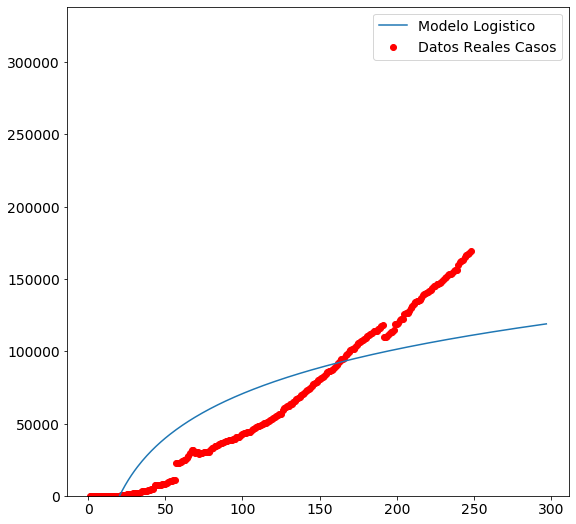

In [79]:
pred_x = list(range(min(x),max(x)+50))
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Reales Casos",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.ylim(0,max(y)*2)
plt.show()

### Interpretacion caso personas infectadas

Como se puede observar el modelo logaritmico no se acopla a los datos del numero de personas infectadas.

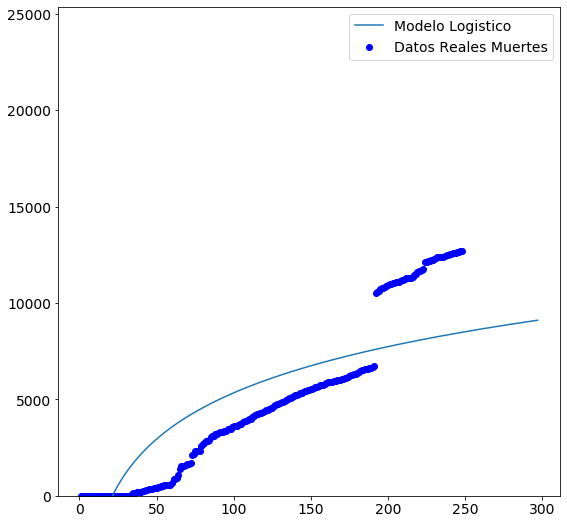

In [78]:
plt.scatter(x,y1,label="Datos Reales Muertes",color="blue")
plt.plot(pred_x, [modelo_logistico(i,exp_fit1[0][0],exp_fit1[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.ylim(0,max(y1)*2)
plt.show()

### Interpretacion caso personas muertas

Como se puede observar al igual que el modelo logaritmico anteriror no se acopla a los datos del numero de personas muertas.

# Conclusion


Con la actualizacion de los datos al dia 02/11/2020 se obtuvo las graficas de las personas infectadas y muertas con la enfermedad COVID-19 en Ecuador, con esto se pudo ver la actualidad que se lleva en el pais con referencia a la enfermedad.